In [1]:
import random 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#initialising the global variables
n = 100
timeslots = 1000

In [3]:

def generate (prob):
    """
    Given the probability, it is going to give either 1 or 0
    """
    x = random.random()
    if (x <= prob):
        return 1
    else:
        return 0

In [4]:
def simulate (LAMBDA):
    
    successful_transmissions = 0
    for _ in range(timeslots):

        packets = []
        for _ in range(n):
            packets.append(generate(LAMBDA))

        total = 0
        for i in range(n):
            total+=packets[i]
        if (total == 1):
            successful_transmissions += 1
        
    return successful_transmissions / timeslots
        

In [5]:
lambdas = np.linspace (0 , 1 , 100)
ans = []
for l in lambdas:
    ans.append(simulate(l))
    

Text(0, 0.5, 'Througput')

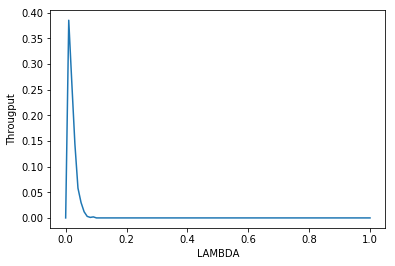

In [6]:
plt.plot(lambdas , ans )
plt.xlabel("LAMBDA")
plt.ylabel("Througput")

# This is Persistent-CSMA 

In [7]:
timeslots = 1000
n = 10

In [8]:
def simulate_2 (LAMBDA , p):
    number_of_packets = [0 for _ in range(n)]
    busy = 0
    successful = 0
    for _ in range(timeslots):

        #Generate the frames for each user
        for u in range(n):
            temp = generate(LAMBDA / n)
            number_of_packets[u]+= temp

        # the channel is free
        if (busy == 0):
            sending_user = -1
            total_ready = 0
            for u in range(n):
                if (number_of_packets[u] > 0):
                    temp = generate(p)
                    if (temp == 1):
                        sending_user = u
                        total_ready += temp

            if (total_ready == 1):
                busy = 2
                number_of_packets[sending_user] -= 1
                successful += 1
            elif (total_ready > 1):
                busy =2

        elif (busy != 0):
            busy-=1
        
    return successful / timeslots
    

In [11]:
lambdas = np.linspace (0 , 1 , 100)
ans = []
for l in lambdas:
    ans.append(simulate_2(l , 0.5))

Text(0, 0.5, 'Througput')

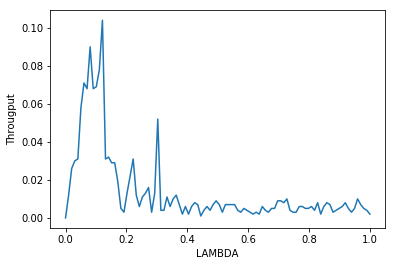

In [12]:
plt.plot(lambdas , ans )
plt.xlabel("LAMBDA")
plt.ylabel("Througput")